# Validation of RBSA 2014 discrete data through loadshape comparison

Input: 
- model must use implicit appliance definitions
- paneldump of the model using 1 hr interval (3600) to ensure energy output

Import the panel dump 

In [1]:
import csv
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as matplotlib
import numpy as np
from datetime import datetime
import time
import glmptime as glmptime

panel_dump = "../paneldump/paneldump_Full_Electric"
loadshape = {}
with open(panel_dump, newline='') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(fr)
    for row in fr :
        print(row)
        row_3 = float(row[3])
        if not loadshape : # populating the first line
            loadshape[row[0]] = {row[1]:{row[2]:row_3}}
        else : # any additional lines 
            if row[0] in loadshape : # Checking if the timestamp is already present 
                if row[1] in loadshape[row[0]].keys() :# Checking if house is present 
                    if row[2] not in loadshape[row[0]][row[1]].keys() : # Check that the appliance is not already in
                        loadshape[row[0]][row[1]].update({row[2]:row_3})# Add another appliance 
                    else : 
                        print('ERROR duplicate appliance', loadshape[row[2]] ,'entry in the same house', loadshape[row[1]])
                else : # if house is not already in the dict
                    loadshape[row[0]][row[1]]={row[2]:row_3}
            else : # if new timestamp 
                loadshape[row[0]] = {row[1]:{row[2]:row_3}}

['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'DISHWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'MICROWAVE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'FREEZER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'REFRIGERATOR', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'RANGE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'WATERHEATER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'CLOTHESWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_99_ELEC', 'DRYER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_98_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_98_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_98_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_98_ELEC', 'DISHWASHER', '0', '0']
['2

['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'MICROWAVE', '0.00235189', '0.00239941']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'FREEZER', '0.0258462', '0.0125179']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'REFRIGERATOR', '0.0928112', '0.0449505']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'RANGE', '0.00329176', '0.00204005']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'WATERHEATER', '0.0529021', '0']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'CLOTHESWASHER', '0.00136546', '0.000661325']
['2018-01-15 02:00:00 PST', 'house_26_ELEC', 'DRYER', '0.00896546', '0.00127751']
['2018-01-15 02:00:00 PST', 'house_25_ELEC', 'HVAC', '0', '0']
['2018-01-15 02:00:00 PST', 'house_25_ELEC', 'LIGHTS', '0.0956149', '0.0239633']
['2018-01-15 02:00:00 PST', 'house_25_ELEC', 'PLUGS', '0.116819', '0.0565779']
['2018-01-15 02:00:00 PST', 'house_25_ELEC', 'DISHWASHER', '0.00180366', '0.000366249']
['2018-01-15 02:00:00 PST', 'house_25_ELEC', 'MICROWAVE', '0.00235189', '0.00239941']
['2018-01-15 02

['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'PLUGS', '0.11077', '0.0536484']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'DISHWASHER', '0.000813542', '0.000165197']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'MICROWAVE', '0.00235189', '0.00239941']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'FREEZER', '0.0251531', '0.0121822']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'REFRIGERATOR', '0.0878792', '0.0425618']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'RANGE', '0.00329157', '0.00203993']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'WATERHEATER', '0.0420146', '0']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'CLOTHESWASHER', '0.00109066', '0.000528231']
['2018-01-15 04:00:00 PST', 'house_42_ELEC', 'DRYER', '0.00396565', '0.000565074']
['2018-01-15 04:00:00 PST', 'house_41_ELEC', 'HVAC', '0.599287', '0.528522']
['2018-01-15 04:00:00 PST', 'house_41_ELEC', 'LIGHTS', '0.0906613', '0.0227219']
['2018-01-15 04:00:00 PST', 'house_41_ELEC', 'PLUGS', '0.11077', '0.0536484']
['2018-0

['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'DISHWASHER', '0.00235726', '0.000478661']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'MICROWAVE', '0.00425083', '0.00433671']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'FREEZER', '0.0244503', '0.0118418']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'REFRIGERATOR', '0.089825', '0.0435042']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'RANGE', '0.00594645', '0.00368528']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'WATERHEATER', '0.0967778', '0']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'CLOTHESWASHER', '0.00230303', '0.00111541']
['2018-01-15 06:00:00 PST', 'house_40_ELEC', 'DRYER', '0.0133197', '0.00189796']
['2018-01-15 06:00:00 PST', 'house_39_ELEC', 'HVAC', '0.188149', '0.165932']
['2018-01-15 06:00:00 PST', 'house_39_ELEC', 'LIGHTS', '0.106367', '0.0266582']
['2018-01-15 06:00:00 PST', 'house_39_ELEC', 'PLUGS', '0.129992', '0.0629581']
['2018-01-15 06:00:00 PST', 'house_39_ELEC', 'DISHWASHER', '0.00235726', '0.000478661']
['2

['2018-01-15 08:00:00 PST', 'house_75_ELEC', 'WATERHEATER', '0.334535', '0']
['2018-01-15 08:00:00 PST', 'house_75_ELEC', 'CLOTHESWASHER', '0.00678834', '0.00328774']
['2018-01-15 08:00:00 PST', 'house_75_ELEC', 'DRYER', '0.0583136', '0.00830923']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'HVAC', '0.227228', '0.200396']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'LIGHTS', '0.173291', '0.0434308']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'PLUGS', '0.211801', '0.10258']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'DISHWASHER', '0.00813232', '0.00165134']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'MICROWAVE', '0.0130443', '0.0133078']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'FREEZER', '0.0241122', '0.011678']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'REFRIGERATOR', '0.0990148', '0.0479551']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'RANGE', '0.0182442', '0.0113067']
['2018-01-15 08:00:00 PST', 'house_74_ELEC', 'WATERHEATER', '0.334535', '0']
['2018-01-15 08:00:00 

['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'HVAC', '0', '0']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'LIGHTS', '0.133914', '0.0335621']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'PLUGS', '0.163618', '0.0792438']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'DISHWASHER', '0.00916088', '0.0018602']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'MICROWAVE', '0.0117246', '0.0119615']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'FREEZER', '0.024795', '0.0120088']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'REFRIGERATOR', '0.0966483', '0.0468089']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'RANGE', '0.0164088', '0.0101693']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'WATERHEATER', '0.23115', '0']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'CLOTHESWASHER', '0.0122511', '0.0059335']
['2018-01-15 10:00:00 PST', 'house_64_ELEC', 'DRYER', '0.114457', '0.0163092']
['2018-01-15 10:00:00 PST', 'house_63_ELEC', 'HVAC', '4.39727', '3.87803']
['2018-01-15 10:00:00 PST', 'house_63_ELEC

['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'PLUGS', '0.150701', '0.0729877']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'DISHWASHER', '0.00726825', '0.00147588']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'MICROWAVE', '0.0164633', '0.0167959']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'FREEZER', '0.0267281', '0.012945']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'REFRIGERATOR', '0.100898', '0.0488673']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'RANGE', '0.0230394', '0.0142785']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'WATERHEATER', '0.173083', '0']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'CLOTHESWASHER', '0.0100413', '0.00486322']
['2018-01-15 12:00:00 PST', 'house_16_ELEC', 'DRYER', '0.109377', '0.0155854']
['2018-01-15 12:00:00 PST', 'house_15_ELEC', 'HVAC', '0', '0']
['2018-01-15 12:00:00 PST', 'house_15_ELEC', 'LIGHTS', '0.123339', '0.0309116']
['2018-01-15 12:00:00 PST', 'house_15_ELEC', 'PLUGS', '0.150701', '0.0729877']
['2018-01-15 12:00:00 PST', 'house_1

['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'MICROWAVE', '0.0188151', '0.0191953']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'FREEZER', '0.0263791', '0.012776']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'REFRIGERATOR', '0.100281', '0.0485682']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'RANGE', '0.0263348', '0.0163208']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'WATERHEATER', '0.131208', '0']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'CLOTHESWASHER', '0.00741687', '0.00359215']
['2018-01-15 15:00:00 PST', 'house_86_ELEC', 'DRYER', '0.0879652', '0.0125344']
['2018-01-15 15:00:00 PST', 'house_85_ELEC', 'HVAC', '0', '0']
['2018-01-15 15:00:00 PST', 'house_85_ELEC', 'LIGHTS', '0.128384', '0.032176']
['2018-01-15 15:00:00 PST', 'house_85_ELEC', 'PLUGS', '0.156852', '0.0759668']
['2018-01-15 15:00:00 PST', 'house_85_ELEC', 'DISHWASHER', '0.00657983', '0.00133609']
['2018-01-15 15:00:00 PST', 'house_85_ELEC', 'MICROWAVE', '0.0188151', '0.0191953']
['2018-01-15 15:00:00 PST', 'h

['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'PLUGS', '0.193758', '0.0938413']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'DISHWASHER', '0.00776989', '0.00157774']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'MICROWAVE', '0.0360624', '0.036791']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'FREEZER', '0.0281258', '0.013622']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'REFRIGERATOR', '0.104613', '0.0506664']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'RANGE', '0.0504701', '0.0312786']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'WATERHEATER', '0.15075', '0']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'CLOTHESWASHER', '0.00827266', '0.00400663']
['2018-01-15 16:00:00 PST', 'house_3_ELEC', 'DRYER', '0.0924681', '0.013176']
['2018-01-15 16:00:00 PST', 'house_2_ELEC', 'HVAC', '0', '0']
['2018-01-15 16:00:00 PST', 'house_2_ELEC', 'LIGHTS', '0.158584', '0.0397448']
['2018-01-15 16:00:00 PST', 'house_2_ELEC', 'PLUGS', '0.193758', '0.0938413']
['2018-01-15 16:00:00 PST', 'house_2_ELEC', 'DISH

['2018-01-15 18:00:00 PST', 'house_20_ELEC', 'DRYER', '0.0907384', '0.0129295']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'HVAC', '0', '0']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'LIGHTS', '0.244109', '0.0611796']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'PLUGS', '0.298326', '0.144486']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'DISHWASHER', '0.0174135', '0.00353595']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'MICROWAVE', '0.0475605', '0.0485214']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'FREEZER', '0.0307449', '0.0148904']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'REFRIGERATOR', '0.118844', '0.0575589']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'RANGE', '0.0665309', '0.0412321']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'WATERHEATER', '0.231708', '0']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'CLOTHESWASHER', '0.00947077', '0.0045869']
['2018-01-15 18:00:00 PST', 'house_19_ELEC', 'DRYER', '0.0907384', '0.0129295']
['2018-01-15 18:00:00 PST', 'house_

['2018-01-15 20:00:00 PST', 'house_36_ELEC', 'WATERHEATER', '0.206583', '0']
['2018-01-15 20:00:00 PST', 'house_36_ELEC', 'CLOTHESWASHER', '0.00878614', '0.00425532']
['2018-01-15 20:00:00 PST', 'house_36_ELEC', 'DRYER', '0.0941343', '0.0134134']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'HVAC', '0', '0']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'LIGHTS', '0.241613', '0.060554']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'PLUGS', '0.29525', '0.142996']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'DISHWASHER', '0.0174783', '0.00354911']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'MICROWAVE', '0.0133274', '0.0135967']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'FREEZER', '0.0305707', '0.0148061']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'REFRIGERATOR', '0.111419', '0.0539625']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'RANGE', '0.0186464', '0.011556']
['2018-01-15 20:00:00 PST', 'house_35_ELEC', 'WATERHEATER', '0.206583', '0']
['2018-01-15 20:00:00 PST', 'house_35_EL

['2018-01-15 22:00:00 PST', 'house_7_ELEC', 'DRYER', '0.0777893', '0.0110844']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'HVAC', '0', '0']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'LIGHTS', '0.186245', '0.0466775']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'PLUGS', '0.227589', '0.110226']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'DISHWASHER', '0.0121535', '0.00246787']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'MICROWAVE', '0.00574907', '0.00586523']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'FREEZER', '0.0279504', '0.013537']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'REFRIGERATOR', '0.103372', '0.0500653']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'RANGE', '0.00804375', '0.00498507']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'WATERHEATER', '0.159125', '0']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'CLOTHESWASHER', '0.00627581', '0.00303952']
['2018-01-15 22:00:00 PST', 'house_6_ELEC', 'DRYER', '0.0777893', '0.0110844']
['2018-01-15 22:00:00 PST', 'house_5_ELEC',

['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'DISHWASHER', '0.00426136', '0.000865306']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'MICROWAVE', '0.00261321', '0.00266601']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'FREEZER', '0.0260298', '0.0126068']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'REFRIGERATOR', '0.0947101', '0.0458702']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'RANGE', '0.00365776', '0.00226687']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'WATERHEATER', '0.0697917', '0']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'CLOTHESWASHER', '0.0020539', '0.00099475']
['2018-01-16 00:00:00 PST', 'house_68_ELEC', 'DRYER', '0.0203004', '0.00289265']
['2018-01-16 00:00:00 PST', 'house_67_ELEC', 'HVAC', '0', '0']
['2018-01-16 00:00:00 PST', 'house_67_ELEC', 'LIGHTS', '0.10573', '0.0264985']
['2018-01-16 00:00:00 PST', 'house_67_ELEC', 'PLUGS', '0.129172', '0.0625609']
['2018-01-16 00:00:00 PST', 'house_67_ELEC', 'DISHWASHER', '0.00426136', '0.000865306']
['2018-01-16 00:00

In [2]:
print(loadshape)

{'2018-01-15 00:00:00 PST': {'house_99_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_98_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_97_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_96_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_95_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WA

In [3]:
loadshape_per_appliance = {} 

# {time : {hvac:sum, lights:sum,...etc }
for t in loadshape.keys() :
    e_val = 0 #resetting energy value at each time stamp 
    appl_dict = [] # resetting the appliance dict at each timestamp
    for h in loadshape[t].keys() : 
        appl_dict.append(loadshape[t][h]) 
    c = Counter()
    for a in appl_dict:
        c.update(a)
    loadshape_per_appliance[t]=dict(c)
print(loadshape_per_appliance) #sum of energy per appliance per time step


{'2018-01-15 00:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, '2018-01-15 01:00:00 PST': {'HVAC': 6.874253999999999, 'LIGHTS': 10.450868999999999, 'PLUGS': 12.767732999999984, 'DISHWASHER': 0.41785491, 'MICROWAVE': 0.2582771399999996, 'FREEZER': 2.576676300000003, 'REFRIGERATOR': 9.373273799999994, 'RANGE': 0.36152885999999934, 'WATERHEATER': 6.881737500000007, 'CLOTHESWASHER': 0.20220651000000014, 'DRYER': 1.9912035000000017}, '2018-01-15 02:00:00 PST': {'HVAC': 10.254269, 'LIGHTS': 9.466257899999983, 'PLUGS': 11.565080999999973, 'DISHWASHER': 0.17857323000000053, 'MICROWAVE': 0.2328371099999997, 'FREEZER': 2.5587936000000053, 'REFRIGERATOR': 9.188374799999997, 'RANGE': 0.3259079999999997, 'WATERHEATER': 5.237307899999991, 'CLOTHESWASHER': 0.13518054000000002, 'DRYER': 0.8876396099999994}, '2018-01-15 03:00:00 PST': {'HVAC': 17.49559

Breaking the dictionary down into lists for plotting

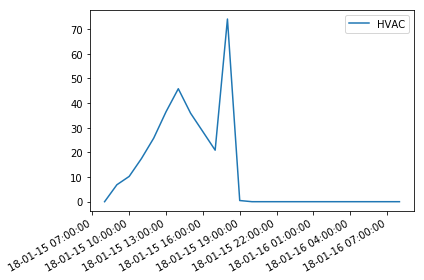

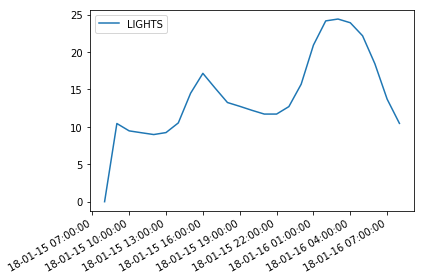

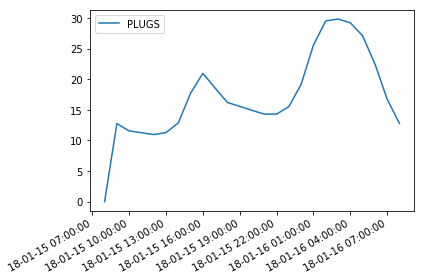

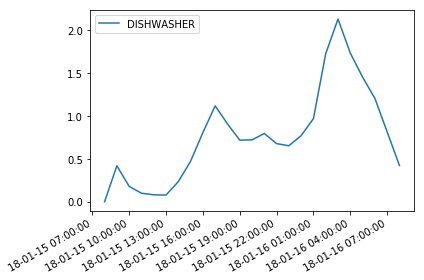

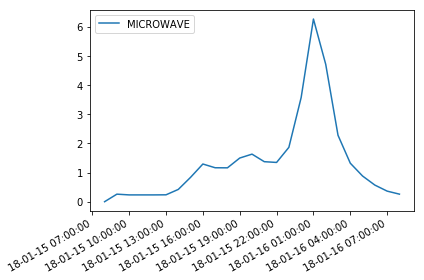

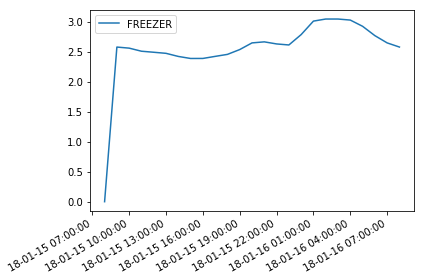

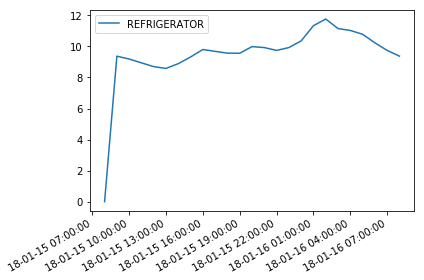

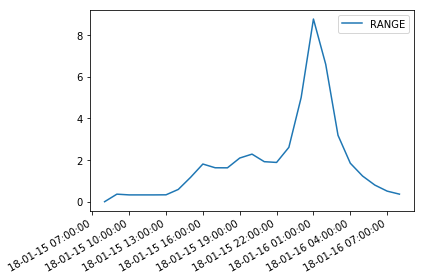

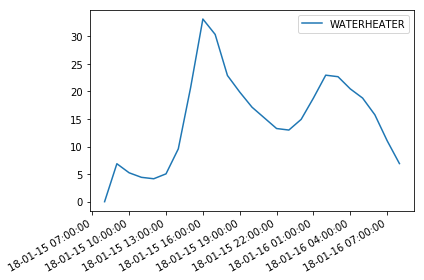

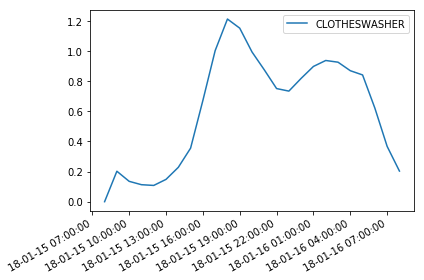

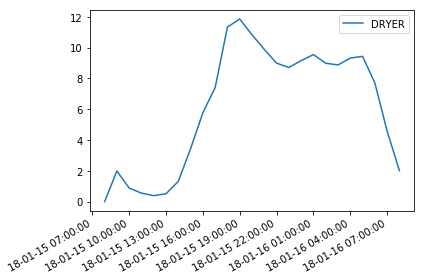

<Figure size 432x288 with 0 Axes>

In [5]:
plt_list = []
for t,val in loadshape_per_appliance.items() : 
    for a, e in val.items() : 
        plt_list.append([t,e,a])

appliance_list = []
for l in plt_list : 
    if l[2] not in appliance_list :
        appliance_list.append(l[2])
a_list = []   
for a in appliance_list : 
    x = []
    y = []
    a_E = 0
    for l in plt_list : 
        if a in l : 
            x.append(glmptime.glmptime(l[0]))
            y.append(l[1])
    a_list.append([a,sum(y)])
    plt.plot(x,y,label=a)  
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    myFmt = md.DateFormatter('%y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.tight_layout()
    tmp = plt.gcf() # get current figure
    plt.show()
    plt.draw()
    tmp.savefig("../output/output_loadshapes/loadshape_" + a + ".png")

In [6]:
# Print total energy per appliance
print(a_list)

[['HVAC', 302.60113690000003], ['LIGHTS', 352.98142769999987], ['PLUGS', 431.3221109999998], ['DISHWASHER', 19.15016898299999], ['MICROWAVE', 33.97486256999999], ['FREEZER', 63.58115280000002], ['REFRIGERATOR', 236.9871833999999], ['RANGE', 47.53978283999997], ['WATERHEATER', 373.0693428000001], ['CLOTHESWASHER', 15.169173029999994], ['DRYER', 153.46028345999994]]


# Plotting original loadshapes 

In [ ]:
input_loadshape_file = "rbsa2014_discrete.txt"
appliance_list = ['lights', 'plugs', 'clotheswasher', 'waterheater', 'refrigerator', 'dryer', 'freezer', 'dishwasher',
                 'range','microwave']
input_loadshape = {}
h_list = []
val_list = []
final_input = {}
with open('schedules.json','r') as j_file :
    data_sched = json.load(j_file)
    for appliance_type in data_sched['schedules'] : 
        week_day_winter = data_sched['schedules'][appliance_type].split('weekday-winter')[1].split('}')[0]+'}'
        input_loadshape[appliance_type] = week_day_winter
        week_day_winter_split = week_day_winter.split(';') # list of sched specifications of each appliance
#         print(len(week_day_winter_split))
        h_list = []
        val_list = []
        for w_line in week_day_winter_split : 
            h_list.append(w_line.replace('{','').split()[1])
            val_list.append(float(w_line.replace('{','').replace('}','').split()[5]))
        print(val_list)
        final_input[appliance_type]=val_list

        plt.plot(h_list,val_list,label=appliance_type)  
        # beautify the x-labels
        plt.legend()
        plt.tight_layout()
        tmp = plt.gcf() # get current figure
        plt.show()
        plt.draw()
        tmp.savefig("output/output_loadshapes/loadshape_" + a + ".png")

# print(input_loadshape)

In [ ]:
print(final_input)


In [ ]:
a_totals = {'LIGHTS': 0.19, 'PLUGS':0.9, 'CLOTHESWASHER' : 0.5, 'WATERHEATER' : 4.0, 'REFRIGERATOR' : 4.0, 
           'DRYER': 6.0, 'FREEZER':2.4, 'DISHWASHER':1.8, 'RANGE':0.25, 'MICROWAVE':0.12}

The total amount of energy defined by the loadshape (DW) :

In [ ]:
print(a_totals['DISHWASHER'])

The total amount of energy consumed by (DW) in the model output :

In [ ]:
print(a_list[3][1]/5/1000)

MICROWAVE from input

In [ ]:
print(a_totals['MICROWAVE'])

MICROWAVE from model 

In [ ]:
print(a_list[4][1]/5/1000)

All the input values for appliance loadshapes :

In [ ]:
for keys,v in a_totals.items() : 
    print("%5.2f kWh/day"%v,keys)
        
sum(final_input['residential_microwave_default'])

All the output values for appliance loadshapes : 

In [ ]:
for i,ap in enumerate(a_list) : 
    e = a_list[i][1]/5
    eu = ap[0]
    v = ap[1]
    if eu in ["LIGHTS","PLUGS"]:
        p = a_totals[eu]
    elif eu != "HVAC":
        p = a_totals[eu]
    else:
        p = np.NaN
    print("%6.2f kWh/day"%e,"%-20.20s"%a_list[i][0],"%5.2f pu"%(e/p))